In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#TAHAP AWAL PROJEK

Proyek ini bertujuan untuk memprediksi pemenang Piala Dunia FIFA 2026 dengan menggunakan metode MACHINE LEARNING berdasarkan dua set data yang disebutkan.
Data pertama adalah hasil pertandingan sepakbola internasional dari 1872 hingga 2022.
Data kedua adalah Peringkat Dunia FIFA dari tahun 1992 hingga 2023.

Diharapkan bahwa dengan menganalisis data-data ini, model MACHINE LEARNING  dapat memprediksi pemenang turnamen.

Logika yang digunakan dalam pemodelan ini mengacu pada klasifikasi biner untuk memprediksi hasil pertandingan sepak bola dalam Piala Dunia.
Model memprediksi antara kemenangan tim tuan rumah dan hasil imbang atau kemenangan tim tamu.

Untuk menghapus keunggulan tim tamu, hasil diprediksi dengan menukar peran tim tamu dan tim tuan rumah, lalu menggunakan rata-rata dari kedua prediksi sebagai probabilitas akhir.

Metode ini bertujuan untuk mengatasi keunggulan bermain di kandang dalam kompetisi Piala Dunia.

# PERSIAPAN DATA

Sebelum masuk dalam persiapan data,kami melakukan import beberapa library python untuk membantu dalam mengolah data.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

import numpy as np: Ini mengimpor modul NumPy yang digunakan untuk komputasi numerik, terutama dalam matriks, array, dan operasi matematika. np digunakan sebagai alias atau singkatan untuk memanggil fungsi-fungsi dari NumPy.

import pandas as pd: Ini mengimpor modul Pandas yang digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data seperti DataFrame, yang memungkinkan untuk membaca, menulis, dan memanipulasi data dari berbagai sumber, termasuk file CSV. pd digunakan sebagai alias untuk memanggil fungsi-fungsi dari Pandas.

Kode import re digunakan untuk mengimpor modul re di Python, yang merupakan singkatan dari Regular Expression. Modul ini menyediakan dukungan untuk mencari dan memanipulasi string menggunakan ekspresi reguler, yang merupakan sekumpulan karakter khusus yang membentuk pola pencarian.

Langkah di sini adalah mempersiapkan data untuk menggunakan teknik feature engineering yang akan membentuk basis data agar bisa diaplikasikan ke dalam algoritma Machine Learning.

#untuk dataset result

In [ ]:
df =  pd.read_csv("/content/drive/MyDrive/assets/world-cup/results.csv")

kode ini melakukan pembacaan atau impor data dari file CSV ke dalam Python dan menyimpannya dalam bentuk DataFrame, struktur data Pandas yang mirip dengan tabel.

pd.read_csv: Fungsi ini dari Pandas digunakan untuk membaca file CSV.

"results.csv": Parameter yang diberikan adalah nama file CSV yang ingin dibaca. Fungsi ini akan membaca file tersebut dan membuat DataFrame dari konten file CSV.

Variabel df akan menampung data dari file CSV tersebut dalam bentuk DataFrame

In [ ]:
df.shape

(45315, 9)

disini kita mengecek dimensi dari data frame tersebut.

df.shape: Ini adalah properti Pandas DataFrame yang memberikan informasi tentang dimensi dari DataFrame, yaitu jumlah baris dan jumlah kolom

berarti dalam dataframe tersebut terdapat 45100 baris dan 9 kolom.

Metode ini sering digunakan untuk mengetahui ukuran atau dimensi DataFrame sebelum melakukan operasi pengolahan data atau analisis lebih lanjut.

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

selanjutnya kita melakukan pengecekan berupa array atau daftar yang berisi nama-nama kolom dari DataFrame.

Metode ini memudahkan dalam memahami struktur DataFrame dan memungkinkan pengguna untuk mengidentifikasi kolom yang tersedia.


Daftar Kolom:

date: Menunjukkan tanggal pertandingan.

home_team: Nama tim tuan rumah.

away_team: Nama tim tamu.

home_score: Skor tim tuan rumah.

away_score: Skor tim tamu.

tournament: Turnamen atau jenis pertandingan.

city: Nama kota tempat pertandingan.

country: Nama negara tempat pertandingan.

neutral: Menunjukkan apakah pertandingan berlangsung di tempat netral atau bukan.  istilah "neutral" digunakan untuk menandai pertandingan yang tidak diadakan di markas tim tuan rumah atau tim tamu

In [ ]:
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


disini kita menampilkan 10 baris pertama dalam dataframe

In [ ]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

disini kita mengecek tipe data apa saja yang terdapat pada data frame.

Output tersebut menunjukkan tipe data dari setiap kolom dalam DataFrame.

- date: Kolom ini berisi data bertipe object,berisi tanggal dalam format string.

- home_team: Kolom ini berisi data bertipe object,berisi nama tim tuan rumah dalam format string.

- away_team: Kolom ini juga berisi data bertipe object,berisi nama tim tamu dalam format string.

- home_score: Kolom ini berisi data bertipe int64, yang berarti berisi skor tim tuan rumah dalam format integer.

- away_score: Kolom ini juga berisi data bertipe int64, yang berarti berisi skor tim tamu dalam format integer.

- tournament: Kolom ini berisi data bertipe object, berisi nama turnamen dalam format string.

- city: Kolom ini berisi data bertipe object,berisi nama kota tempat pertandingan diadakan dalam format string.

- country: Kolom ini berisi data bertipe object, berisi nama negara tempat pertandingan diadakan dalam format string.

- neutral: Kolom ini berisi data bertipe bool, yang berisi informasi apakah pertandingan diadakan di tempat netral atau tidak. bertipe boolean yaitu True atau False.



In [ ]:
df["date"] = pd.to_datetime(df["date"])

 kode ini menggunakan Pandas dalam Python untuk mengonversi kolom "date" dalam DataFrame df menjadi tipe data datetime.

 - alasan Mengonversi kolom "date" ke tipe data datetime adalah memungkinkan analisis waktu yang lebih efisien

 Melalui pd.to_datetime(), Pandas secara otomatis mengubah kolom "date" yang awalnya bisa berupa string atau format lain menjadi tipe data datetime yang dapat digunakan dalam berbagai analisis berbasis waktu. Ini memberikan fleksibilitas dan kemudahan dalam manipulasi dan analisis data yang berkaitan dengan waktu.

- selain itu.. hal ini dilakukan untuk Filtering dan indexing, yaitu Memungkinkan untuk filter data berdasarkan rentang tanggal tertentu atau membuat indeks berdasarkan tanggal, mempermudah analisis data terkait waktu.

**penjelasan lebih rinci tentang code**

pd.to_datetime(): Fungsi dari Pandas yang digunakan untuk mengonversi data menjadi tipe data datetime.
df["date"]: Menggunakan syntax df["date"] untuk mengakses kolom "date" dalam DataFrame df.

pd.to_datetime(df["date"]): Mengonversi isi kolom "date" menjadi tipe data datetime. Ini dapat mengubah data yang semula dalam format string atau format lain menjadi objek datetime yang dapat digunakan untuk manipulasi waktu atau analisis berbasis waktu.

Dengan menggunakan pd.to_datetime(), kolom "date" dalam DataFrame akan diubah menjadi format yang kompatibel untuk analisis lebih lanjut berdasarkan waktu.



In [ ]:
df.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
45305,2023-11-21,Austria,Germany,2,0,Friendly,Vienna,Austria,False
45306,2023-11-21,Poland,Latvia,2,0,Friendly,Warsaw,Poland,False
45307,2023-11-21,Republic of Ireland,New Zealand,1,1,Friendly,Dublin,Republic of Ireland,False
45308,2023-11-21,Gibraltar,Netherlands,0,6,UEFA Euro qualification,Faro-Loulé,Portugal,True
45309,2023-11-21,Greece,France,2,2,UEFA Euro qualification,Athens,Greece,False
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False
45314,2023-11-21,Romania,Switzerland,1,0,UEFA Euro qualification,Bucharest,Romania,False


disini kita tampilkan 10 bagian akhir dari data frame

In [ ]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

selanjutnya kita memeriksa tipe data dari masing-masing kolom.

Hasil dari df.dtypes adalah sebuah Series yang berisi informasi mengenai tipe data dari masing-masing kolom dalam DataFrame.
Informasi ini bisa membantu untuk memahami jenis data yang terdapat dalam setiap kolom

dan bisa kita lihat perubahan yang telah dilakukan pada kolom date.. yang semula bertipe string.. sekarang telah menjadi date time yang digunakan untuk menyimpan nilai tanggal dan waktu.




In [ ]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

oke selanjutnya adalah kita menggunakan Metode df.isna().sum() pada Pandas DataFrame yang bertujuan untuk menghitung jumlah nilai yang hilang atau NaN (Not a Number) pada setiap kolom DataFrame.

hal ini bertujuan untuk mengevaluasi seberapa banyak data yang hilang dalam setiap kolom DataFrame, memberikan wawasan penting dalam persiapan data

penjelasan lebih rnci

df.isna(): Metode ini menghasilkan DataFrame baru yang berisi nilai boolean (True atau False) di mana nilai True menunjukkan keberadaan nilai yang hilang pada setiap sel dalam DataFrame. Jika ada nilai yang hilang, itu akan diwakili oleh True, jika tidak, akan False.

.sum(): Setelah mendapatkan DataFrame boolean, .sum() digunakan untuk menjumlahkan nilai True di setiap kolom. Ini menghitung jumlah nilai yang hilang pada setiap kolom dan mengembalikan hasil dalam bentuk Series yang menunjukkan jumlah nilai yang hilang dalam setiap kolom DataFrame.

bisa di lihat bawah data dalam dataset "result" bersih dari Nan.

Output yang ditunjukkan menunjukkan jumlah nol (0) di setiap kolom dari suatu dataframe. Karena menggunakan fungsi isnull() atau sum() pada dataframe di Pandas. Jumlah nol tersebut bisa menandakan bahwa tidak ada nilai yang kosong (missing values) dalam kolom-kolom tersebut.



In [ ]:
df.dropna(inplace=True)


code ini digunakan untuk menghapus baris yang memiliki nilai kosong (missing values) dari DataFrame.

Dalam kasus ini, inplace=True akan mengubah DataFrame df secara langsung dengan menghapus baris yang memiliki nilai kosong, dan tidak mengembalikan DataFrame baru.

Dengan menggunakan inplace=True, perubahan dilakukan langsung pada DataFrame yang ada, memungkinkan pengguna untuk menghindari membuat salinan DataFrame baru dan langsung mengubah DataFrame yang ada dengan menghapus baris yang tidak lengkap.

**karena tidak terjadi perubahan pada dataframe dapat dipastikan dataframe ini bersih dari missing values**

In [ ]:
df.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

langkah selanjutnya adalah memastikan kembali apakah terdapat keberadaan nilai null (NaN/missing values) di setiap kolom DataFrame (df).

output dari kode ini adalah deretan boolean yang menunjukkan keberadaan nilai null dalam setiap kolom DataFrame.

<Axes: >

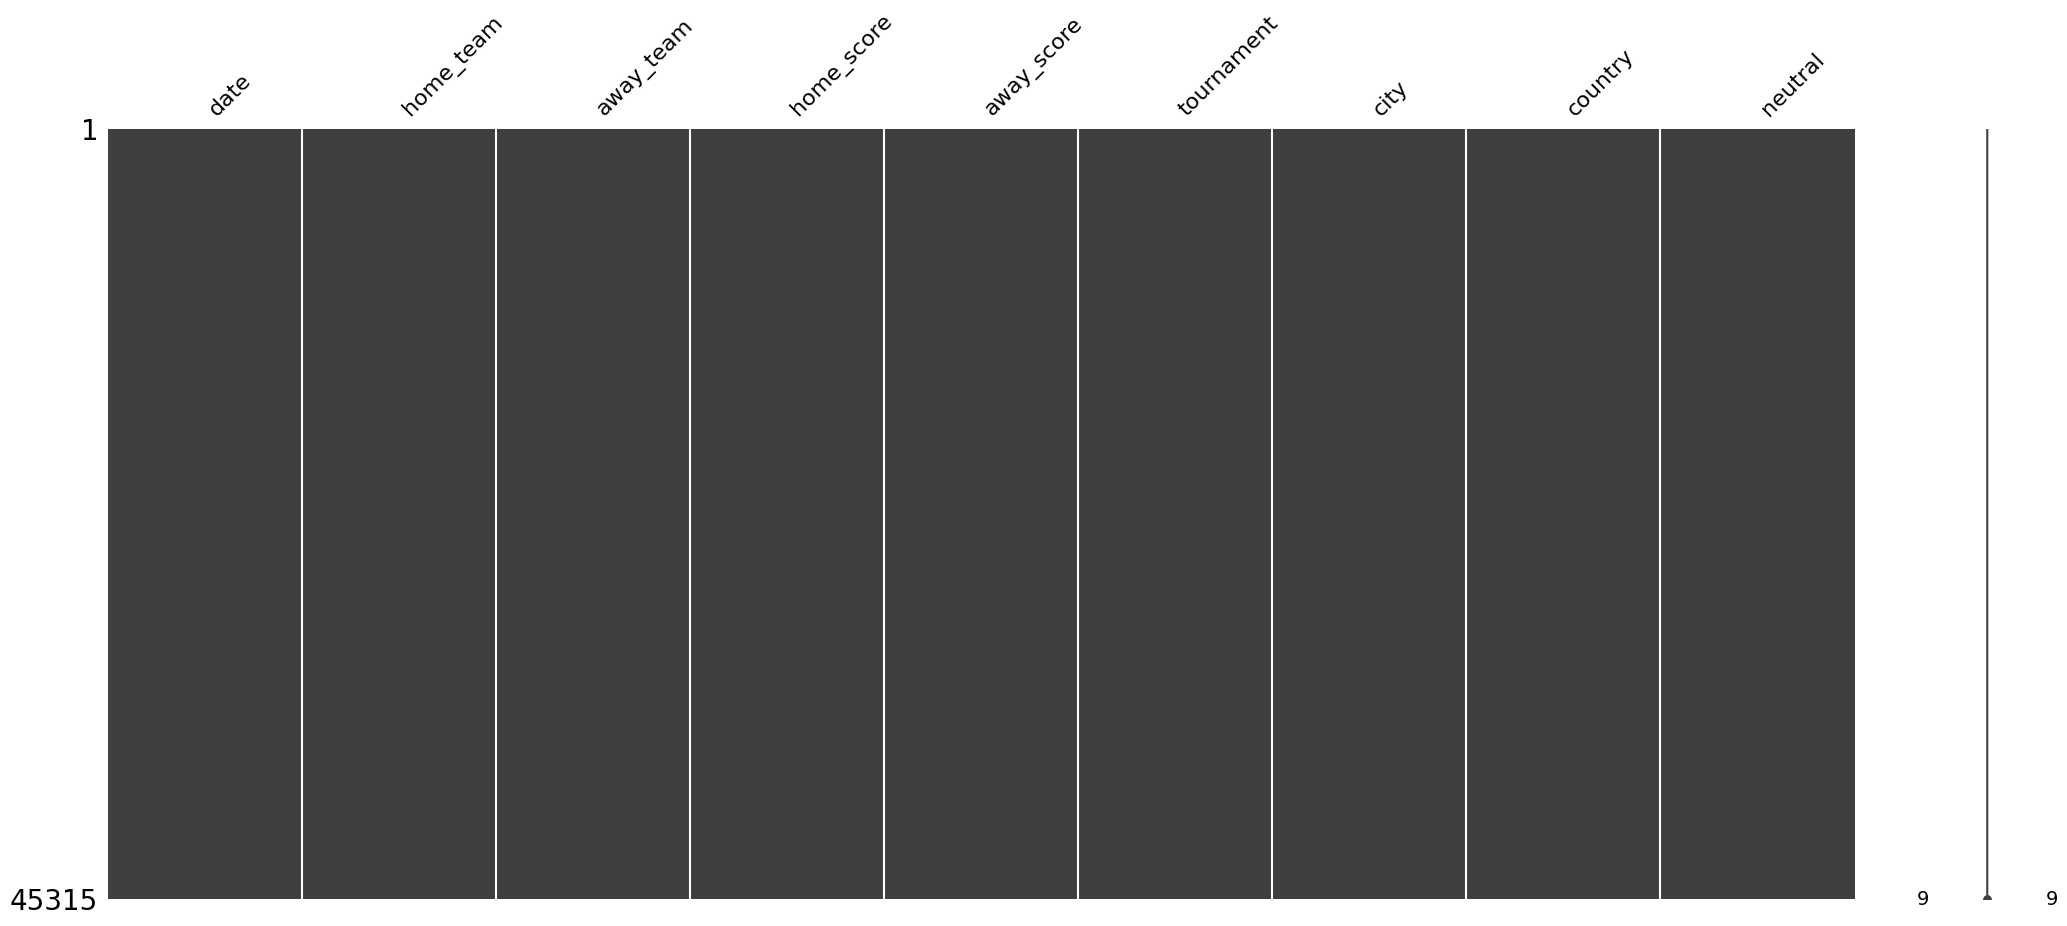

In [ ]:
import missingno as msno
msno.matrix(df)

disini kita memvisualisasikan data yang hilang dalam DataFrame df menggunakan libraray missingno (diimpor sebagai msno)

bisa dilihat tidak ada data data yang hilang

karena baris hitam menunjukkan data yang ada dan baris putih menunjukkan data yang hilang

In [ ]:
df.describe()

,home_score,away_score
count,45315.000000,45315.000000
mean,1.739314,1.178241
std,1.746904,1.392095
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


disini kita memanggil fungsi describe yang menghasilkan berbagai statistik ringkasan, termasuk count (jumlah), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (median atau kuartil kedua), 75% (kuartil ketiga), dan max (nilai maksimum).

Statistik ini dihasilkan untuk setiap kolom numerik dalam DataFrame,
itulah yang menjadi alasan kenapa hanya menampilkan kolom home dan away score..

**penjelasan output**

- count: Jumlah total entri yang valid (tidak termasuk nilai NaN).
mean: Nilai rata-rata dari entri.

- std: Standar deviasi dari entri, yang merupakan ukuran seberapa jauh setiap angka dalam kumpulan data dari mean (rata-rata).

- min: Nilai minimum dalam entri.

- 25%: Kuartil pertama, juga dikenal sebagai kuartil bawah. 25% dari data berada di bawah nilai ini.

- 50%: Median atau kuartil kedua. 50% dari data berada di bawah nilai ini.

- 75%: Kuartil ketiga, juga dikenal sebagai kuartil atas. 75% dari data berada di bawah nilai ini.

- max: Nilai maksimum dalam entri.

Jadi, untuk kolom home_score, ada 45100 entri dengan rata-rata skor sekitar 1.74, standar deviasi sekitar 1.75, dan skor berkisar dari 0 hingga 31.

Untuk kolom away_score, ada juga 45100 entri dengan rata-rata skor sekitar 1.18, standar deviasi sekitar 1.39, dan skor berkisar dari 0 hingga 21.

**tahap menangani outlier**

Outliers adalah data yang memiliki nilai sangat jauh dari nilai umumnya, atau dengan kata lain memiliki nilai yang ekstrem. Outliers dapat mempengaruhi pegambilan kesimpulan penelitian dari hasil uji statistik.

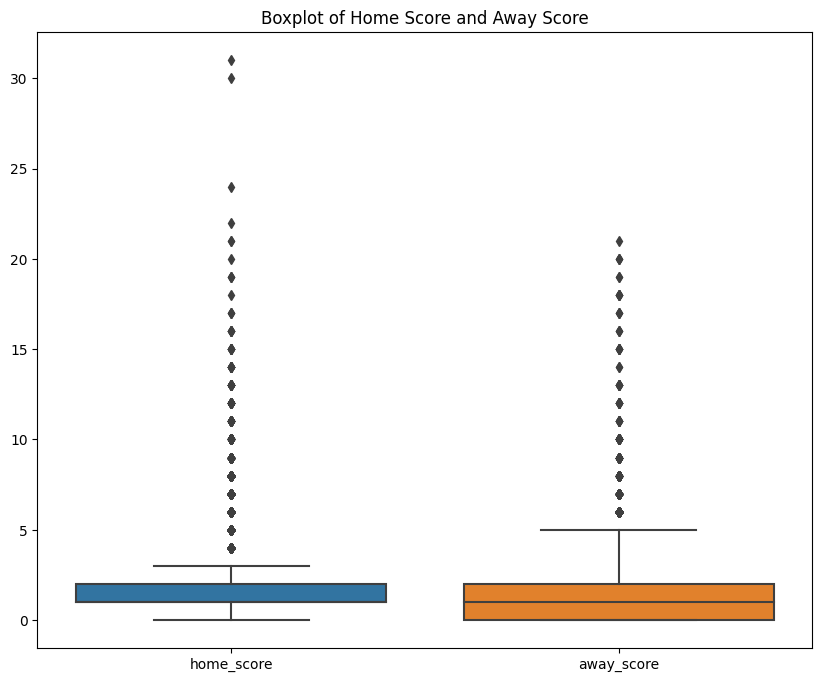

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_home_away_score = df[['home_score','away_score']]
plt.figure(figsize = (10, 8))
sns.boxplot(data=data_home_away_score)
plt.title('Boxplot of Home Score and Away Score')
plt.show()

sebelum kita menangani kolom yang berisi outlier.. kita terlebih dahulu memvisualisasikan dengan menggunakan box plot

box plot ini memberikan gambaran tentang distribusi dan outlier data dalam kolom tersebut.

bisa kita lihat pada kolom home dari range 0 - 31 terdapat visualisasi dari outlier yang menunjukan bahwa di kolom ini terdapat outlier

disini kita menggunakan metode iqr

Metode IQR (Interquartile Range) adalah metode statistik yang digunakan untuk mengukur sebaran data dengan menghitung rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam sebuah dataset

In [ ]:
def clean_outliner(data,start_quantile,end_quantile) :
  data = data.copy()
  Q1 = data.quantile(start_quantile)
  Q3 = data.quantile(end_quantile)
  IQR = Q3 - Q1
  return(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 *IQR)


df = df.loc[clean_outliner(df['home_score'],0.25,0.75)]
df = df.loc[clean_outliner(df['away_score'],0.25,0.75)]


pada bagian ini kita menghapus (outliers) dari kolom home_score dan away_score dalam DataFrame df menggunakan metode IQR (Interquartile Range).

Fungsi clean_outliner(data,start_quantile,end_quantile) didefinisikan. Fungsi ini menerima tiga argumen: data (Series atau DataFrame), start_quantile (kuartil awal), dan end_quantile (kuartil akhir).

Fungsi ini pertama-tama membuat salinan dari data untuk menghindari perubahan pada objek asli.

Kemudian, fungsi ini menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) dari data menggunakan metode quantile().

IQR dihitung sebagai perbedaan antara Q3 dan Q1.

Akhirnya, fungsi ini mengembalikan boolean Series yang menunjukkan apakah setiap nilai dalam data berada dalam rentang yang didefinisikan oleh Q1 - 1.5IQR dan Q3 + 1.5IQR.

Nilai di luar rentang ini dianggap sebagai outlier.

Fungsi clean_outliner() kemudian diterapkan pada kolom home_score dan away_score dalam DataFrame df.

Baris yang berisi outlier dihapus dari DataFrame menggunakan metode loc[].

Secara keseluruhan, kode ini membersihkan DataFrame df dari pencilan dalam kolom home_score dan away_score menggunakan metode IQR. Metode ini umum digunakan dalam analisis statistik untuk mengidentifikasi dan menghapus pencilan.

<ipython-input-18-4045d50b0775>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'away score')

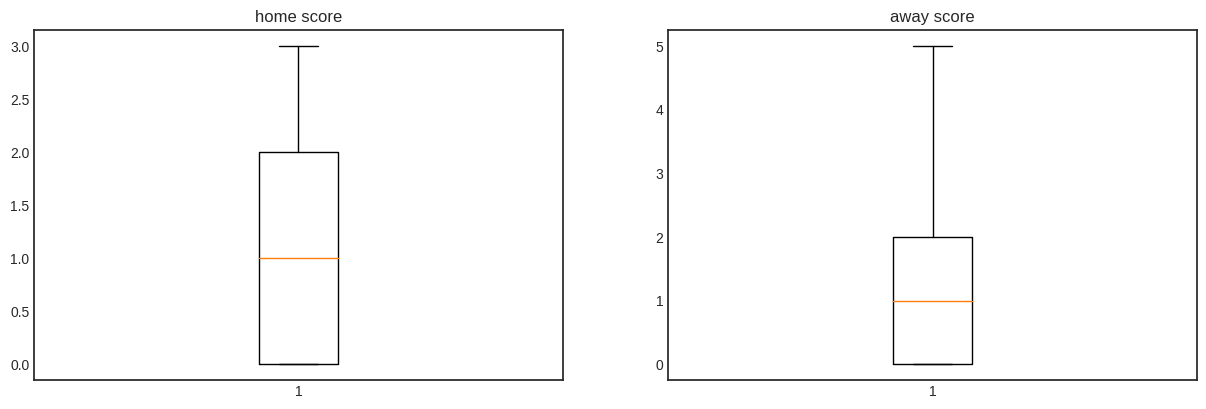

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['home_score'])
ax.set_title('home score')
ax=plt.subplot(222)
plt.boxplot(df['away_score'])
ax.set_title('away score')

kita visualisasikan kembali .. untuk mengecek.. apakah outlier itu sudah hilang pada home dan away score

<Axes: >

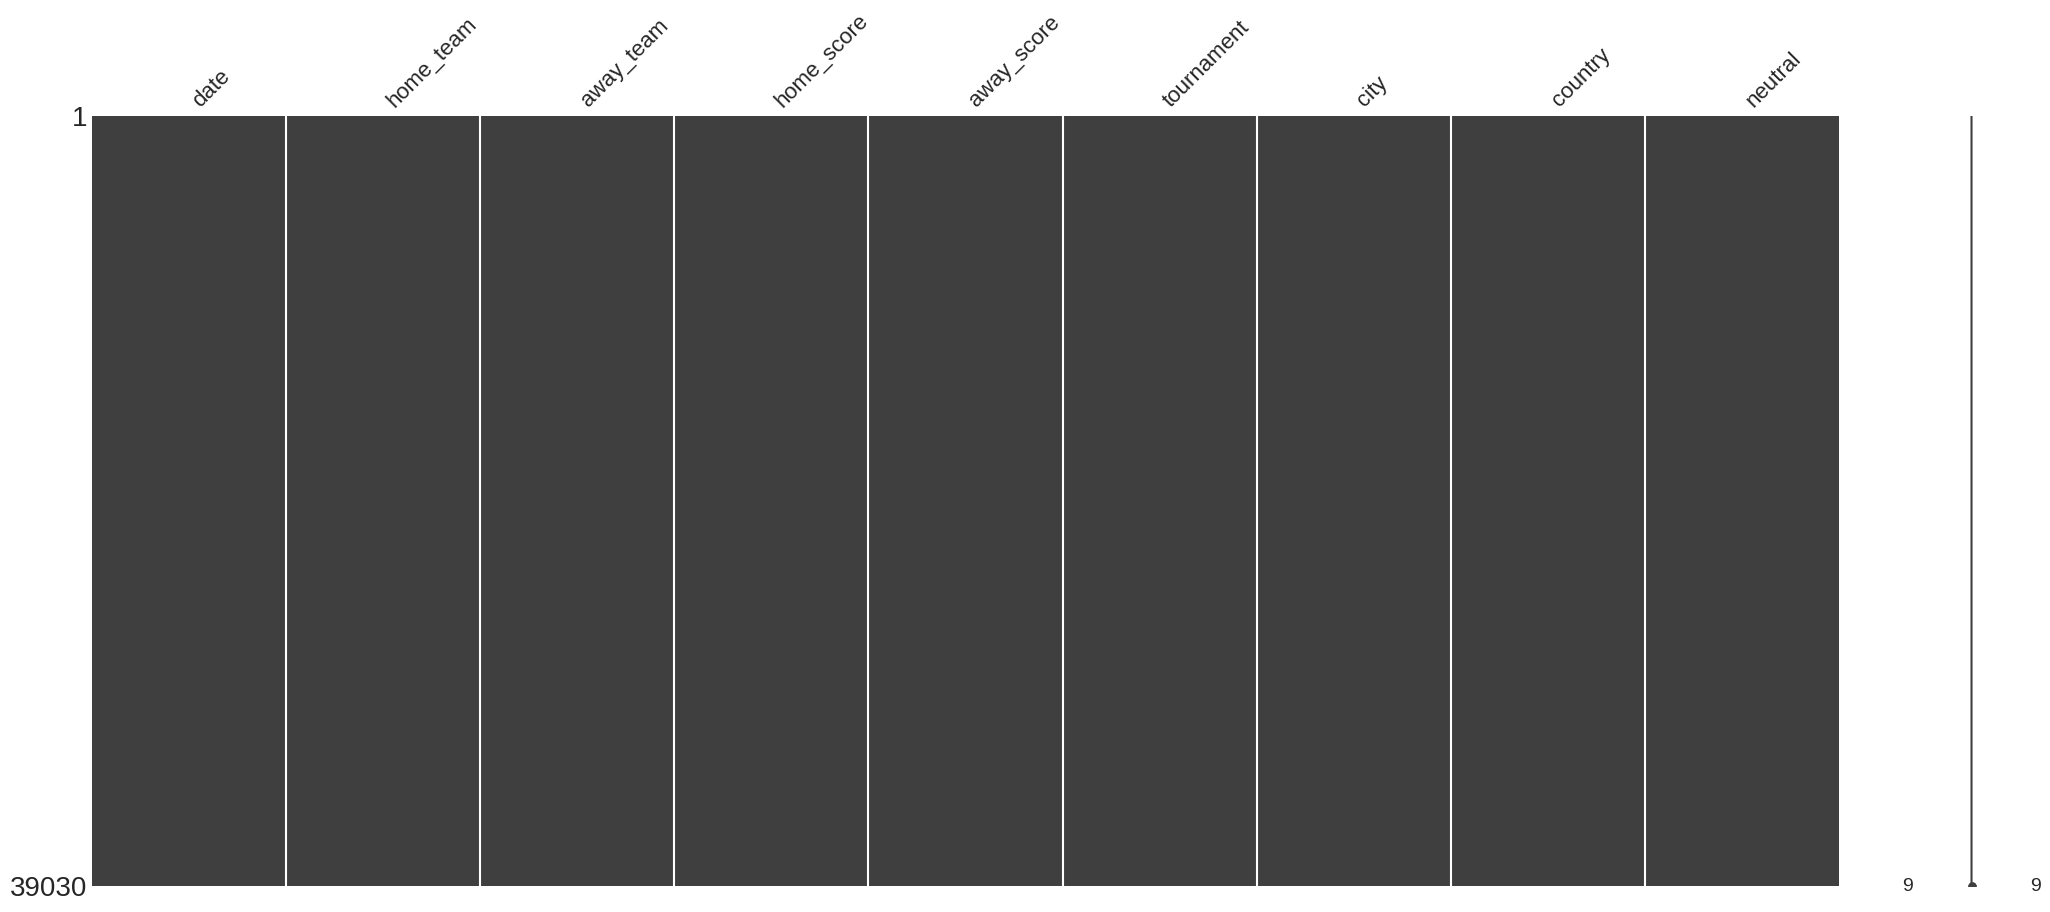

In [ ]:
import missingno as msno
msno.matrix(df)

disini kita memvisualisasikan kembali.. untuk mengecek... setelah dilakukan outlier apakah terdpat data yang tidak ada isinya..

In [ ]:
df.shape

(39030, 9)

bisa kita lihat terdapat pengurangan pada baris setelah dilakukan metode IQR. ..Baris yang hilang setelah menerapkan metode IQR adalah baris yang berisi outliers.

Sekitar 6251 baris yang hilang setelah dilakukan metode IQR

 Ini adalah cara yang umum digunakan untuk membersihkan data dan mengurangi pengaruh outlier pada analisis lebih lanjut.

#untuk dataset fifa ranking

Dataset yang dipakai untuk analisis ini terdiri dari pertandingan-pertandingan FIFA dari tahun 2018 setelah Piala Dunia 2018 hingga pertandingan terakhir sebelum Piala Dunia 2026.

Fokus analisis adalah pada pertandingan-pertandingan yang dimainkan sebagai bagian dari persiapan dan proses klasifikasi menuju Piala Dunia, bukan pada pertandingan resmi Piala Dunia itu sendiri.

Tujuannya adalah untuk memahami dan menganalisis performa tim-tim nasional dalam rangka persiapan dan seleksi menuju keikutsertaan di Piala Dunia.

In [ ]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
45282,2023-11-21,Philippines,Indonesia,1,1,FIFA World Cup qualification,Manila,Philippines,False
45283,2023-11-21,Vietnam,Iraq,0,1,FIFA World Cup qualification,Hanoi,Vietnam,False
45285,2023-11-21,Jordan,Saudi Arabia,0,2,FIFA World Cup qualification,Amman,Jordan,False
45287,2023-11-21,Nepal,Yemen,0,2,FIFA World Cup qualification,Kathmandu,Nepal,False
45314,2023-11-21,Romania,Switzerland,1,0,UEFA Euro qualification,Bucharest,Romania,False


df.sort_values("date").tail() adalah perintah dalam Pandas Python yang mengurutkan DataFrame df berdasarkan kolom "date" secara ascending (urutan dari yang terkecil hingga terbesar) dan kemudian menampilkan lima baris terakhir dari DataFrame yang sudah diurutkan.

Hasilnya adalah lima baris terakhir dari DataFrame df setelah diurutkan berdasarkan kolom "date".

ini berguna untuk melihat entri terakhir dari data yang telah diurutkan berdasarkan tanggal atau waktu.

In [ ]:
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True) dalam Pandas Python bertujuan untuk memfilter DataFrame df berdasarkan kolom "date" dengan kondisi tanggal lebih besar dari atau sama dengan 1 Agustus 2018.

df["date"] >= "2018-8-1": Membandingkan nilai dalam kolom "date" dengan tanggal 1 Agustus 2018. Menghasilkan sebuah boolean Series yang menunjukkan baris mana yang memenuhi kondisi tersebut.

df[(df["date"] >= "2018-8-1")]: Menggunakan boolean Series dari langkah sebelumnya untuk memfilter DataFrame, hanya menyertakan baris-baris yang memenuhi kondisi tanggal lebih besar dari atau sama dengan 1 Agustus 2018.

.reset_index(drop=True): Mengatur ulang indeks DataFrame yang sudah difilter agar dimulai dari 0 dan menghapus indeks sebelumnya.
Hasilnya adalah DataFrame baru yang hanya berisi baris-baris dengan nilai tanggal pada kolom "date" lebih besar dari atau sama dengan 1 Agustus 2018.

Hasilnya adalah DataFrame baru yang hanya berisi baris-baris dengan nilai tanggal pada kolom "date" lebih besar dari atau sama dengan 1 Agustus 2018.

In [ ]:
df.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-08-04,Belize,Barbados,1,0,Friendly,San Pedro,Belize,False
1,2018-08-04,Palestine,Iraq,0,3,Friendly,Al-Ram,Palestine,False
2,2018-08-15,Guatemala,Cuba,3,0,Friendly,Guatemala City,Guatemala,False
3,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True
4,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False


In [ ]:
df.home_team.value_counts()

Mexico                51
United States         46
Qatar                 41
Bahrain               41
Morocco               39
                      ..
Parishes of Jersey     1
Cook Islands           1
Padania                1
Basque Country         1
Tibet                  1
Name: home_team, Length: 252, dtype: int64

Kode df.home_team.value_counts() digunakan untuk menghitung frekuensi atau jumlah kemunculan setiap nilai unik dalam kolom “home_team” dari DataFrame df.

Fungsi value_counts() dari pustaka pandas mengembalikan sebuah Series yang berisi jumlah kemunculan setiap nilai unik dalam kolom yang ditentukan, dalam hal ini “home_team”. Nilai-nilai ini diurutkan dalam urutan menurun sehingga nilai yang paling sering muncul akan ditampilkan di atas.

code ini akan menghitung berapa kali setiap nama homw team muncul dalam kolom tersebut, memberikan jumlah masing-masing tim yang muncul dalam dataset.

In [ ]:
rank = pd.read_csv("/content/drive/MyDrive/assets/world-cup/fifa_ranking-2023-07-20.csv")

Kode rank = pd.read_csv("fifa_ranking-2023-07-20.csv") digunakan untuk membaca file CSV bernama “fifa_ranking-2023-07-20.csv” dan menyimpan datanya ke dalam DataFrame pandas yang disebut rank.

 penjelasan lebih rinci:

pd.read_csv() adalah fungsi dari pustaka pandas yang digunakan untuk membaca file CSV dan mengubahnya menjadi DataFrame. DataFrame adalah struktur data dua dimensi, seperti tabel, dengan baris dan kolom.

"fifa_ranking-2023-07-20.csv" adalah nama file CSV yang ingin dibaca.

rank = berarti Anda menyimpan DataFrame yang dihasilkan ke dalam variabel bernama rank. Anda kemudian dapat menggunakan rank untuk merujuk ke DataFrame ini di bagian lain dari kode Anda.

Dengan menggunakan fungsi pd.read_csv(), kode ini akan membaca file CSV dengan nama "fifa_ranking-2023-07-20.csv" dan memuat datanya ke dalam variabel rank, yang kemungkinan besar merupakan suatu DataFrame Pandas.

Proses ini memungkinkan untuk melakukan analisis atau manipulasi data lebih lanjut dengan menggunakan Python dan library Pandas.



In [ ]:
rank.shape

(64757, 8)

disini kita mengecek dimensi dari data frame tersebut.

df.shape: Ini adalah properti Pandas DataFrame yang memberikan informasi tentang dimensi dari DataFrame, yaitu jumlah baris dan jumlah kolom

berarti dalam dataframe tersebut terdapat 64757 baris dan 8 kolom.

In [ ]:
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')

selanjutnya kita melakukan pengecekan berupa array atau daftar yang berisi nama-nama kolom dari DataFrame.

Metode ini memudahkan dalam memahami struktur DataFrame dan memungkinkan pengguna untuk mengidentifikasi kolom yang tersedia.

adapun penjelasannya sebagai berikut

- rank: menunjukkan peringkat negara

- country_full: menunjukkan nama lengkap dari suatu negara.

- country_abrv: menunjukkan singkatan dari nama negara.

- total_points: menunjukkan jumlah total poin yang diperoleh.

- previous_points: menunjukkan jumlah poin sebelumnya.

- rank_change:menunjukkan perubahan dalam peringkat.

- confederation:menunjukkan liga yang dimainkan.

- rank_date:menunjukkan tanggal peringkat tersebut diberikan.

In [ ]:
rank.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31
5,101,Togo,TOG,10.0,0.0,0,CAF,1992-12-31
6,102,Angola,ANG,10.0,0.0,0,CAF,1992-12-31
7,95,Suriname,SUR,12.0,0.0,0,CONCACAF,1992-12-31
8,103,Luxembourg,LUX,10.0,0.0,0,UEFA,1992-12-31
9,105,St. Vincent and the Grenadines,VIN,9.0,0.0,0,CONCACAF,1992-12-31


Disini kita menggunakan fungsi head.. untuk mengecek indeks pertama dari dataframe rank

In [ ]:
rank.tail(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
64747,61,Slovenia,SVN,1391.04,1391.04,1,UEFA,2023-07-20
64748,62,Bosnia and Herzegovina,BIH,1381.10,1381.10,1,UEFA,2023-07-20
64749,63,South Africa,RSA,1368.25,1369.49,1,CAF,2023-07-20
64750,64,Northern Ireland,NIR,1361.17,1361.17,0,UEFA,2023-07-20
64751,65,Albania,ALB,1357.39,1357.39,0,UEFA,2023-07-20
64752,66,Cabo Verde,CPV,1354.65,1354.65,0,CAF,2023-07-20
64753,67,Iceland,ISL,1352.98,1352.98,0,UEFA,2023-07-20
64754,68,North Macedonia,MKD,1350.53,1350.53,0,UEFA,2023-07-20
64755,58,Jamaica,JAM,1409.73,1367.83,-5,CONCACAF,2023-07-20
64756,205,US Virgin Islands,VIR,816.59,816.59,-3,CONCACAF,2023-07-20


In [ ]:
rank.dtypes

rank                 int64
country_full        object
country_abrv        object
total_points       float64
previous_points    float64
rank_change          int64
confederation       object
rank_date           object
dtype: object

disini kita mengecek tipe data pada masing masing kolom

In [ ]:
rank.isna().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

disini kita mengecek apakah terdapat nilai yang kosong pada setiap kolom.

In [ ]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)

disini kita melakukan dua hal utama:

- rank["rank_date"] = pd.to_datetime(rank["rank_date"]):

Baris ini mengubah kolom “rank_date” dalam DataFrame rank menjadi tipe data datetime. Fungsi pd.to_datetime() dari pustaka pandas digunakan untuk mengubah format string atau lainnya menjadi datetime, yang memudahkan manipulasi dan perbandingan tanggal.

- rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True):

Baris ini memfilter DataFrame rank untuk hanya menyertakan baris di mana “rank_date” lebih besar atau sama dengan “2018-8-1”. Dengan kata lain, ini hanya menyertakan data dari tanggal 1 Agustus 2018 dan seterusnya. Fungsi reset_index(drop=True) kemudian digunakan untuk mereset indeks DataFrame setelah melakukan filter, dengan parameter drop=True berarti indeks lama dihapus dan tidak disimpan sebagai kolom baru.

Jadi, secara keseluruhan, kode ini mempersiapkan DataFrame “rank” untuk analisis lebih lanjut dengan memastikan bahwa kolom tanggal dikenali dengan benar dan DataFrame hanya berisi data dari tanggal tertentu ke depan.

In [ ]:
rank.shape

(7994, 8)

disini kita mengecek jumlah baris dan kolom setelah dilakukan pembatasan pada dataframe

terdapat 7994 baris dan 8 kolom

In [ ]:
rank.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,108,Central African Republic,CTA,1196.0,1196.0,0,CAF,2018-08-16
1,206,Bahamas,BAH,868.0,868.0,0,CONCACAF,2018-08-16
2,75,China PR,CHN,1320.0,1320.0,0,AFC,2018-08-16
3,74,South Africa,RSA,1327.0,1324.0,0,CAF,2018-08-16
4,73,Syria,SYR,1328.0,1328.0,0,AFC,2018-08-16
5,72,El Salvador,SLV,1332.0,1332.0,0,CONCACAF,2018-08-16
6,70,FYR Macedonia,MKD,1336.0,1336.0,-1,UEFA,2018-08-16
7,70,Saudi Arabia,KSA,1336.0,1348.0,3,AFC,2018-08-16
8,69,Panama,PAN,1343.0,1396.0,14,CONCACAF,2018-08-16
9,67,Guinea,GUI,1344.0,1344.0,-1,CAF,2018-08-16


disini kita mengecek indeks pertama pada dataframe setelah data itu dibatasi.

In [ ]:
rank.dtypes

rank                        int64
country_full               object
country_abrv               object
total_points              float64
previous_points           float64
rank_change                 int64
confederation              object
rank_date          datetime64[ns]
dtype: object

disini kita mengecek tipe data pada setiap kolom

bisa diperhatikan bahwa kolom rank_date sekarang sudah berubah menjadi tipe datetime..


In [ ]:
rank.isnull().any()

rank               False
country_full       False
country_abrv       False
total_points       False
previous_points    False
rank_change        False
confederation      False
rank_date          False
dtype: bool

disini kita mengecek apakah  terdapat keberadaan nilai null (NaN/missing values) di setiap kolom DataFrame (df).

output dari kode ini adalah deretan boolean yang menunjukkan keberadaan nilai null dalam setiap kolom DataFrame.

disini bertanda false karena tidak ada data yang null

In [ ]:
rank.isna().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

disini kita melakukan cek sekali lagi ....untuk memastikan tidak ada data yang null

<Axes: >

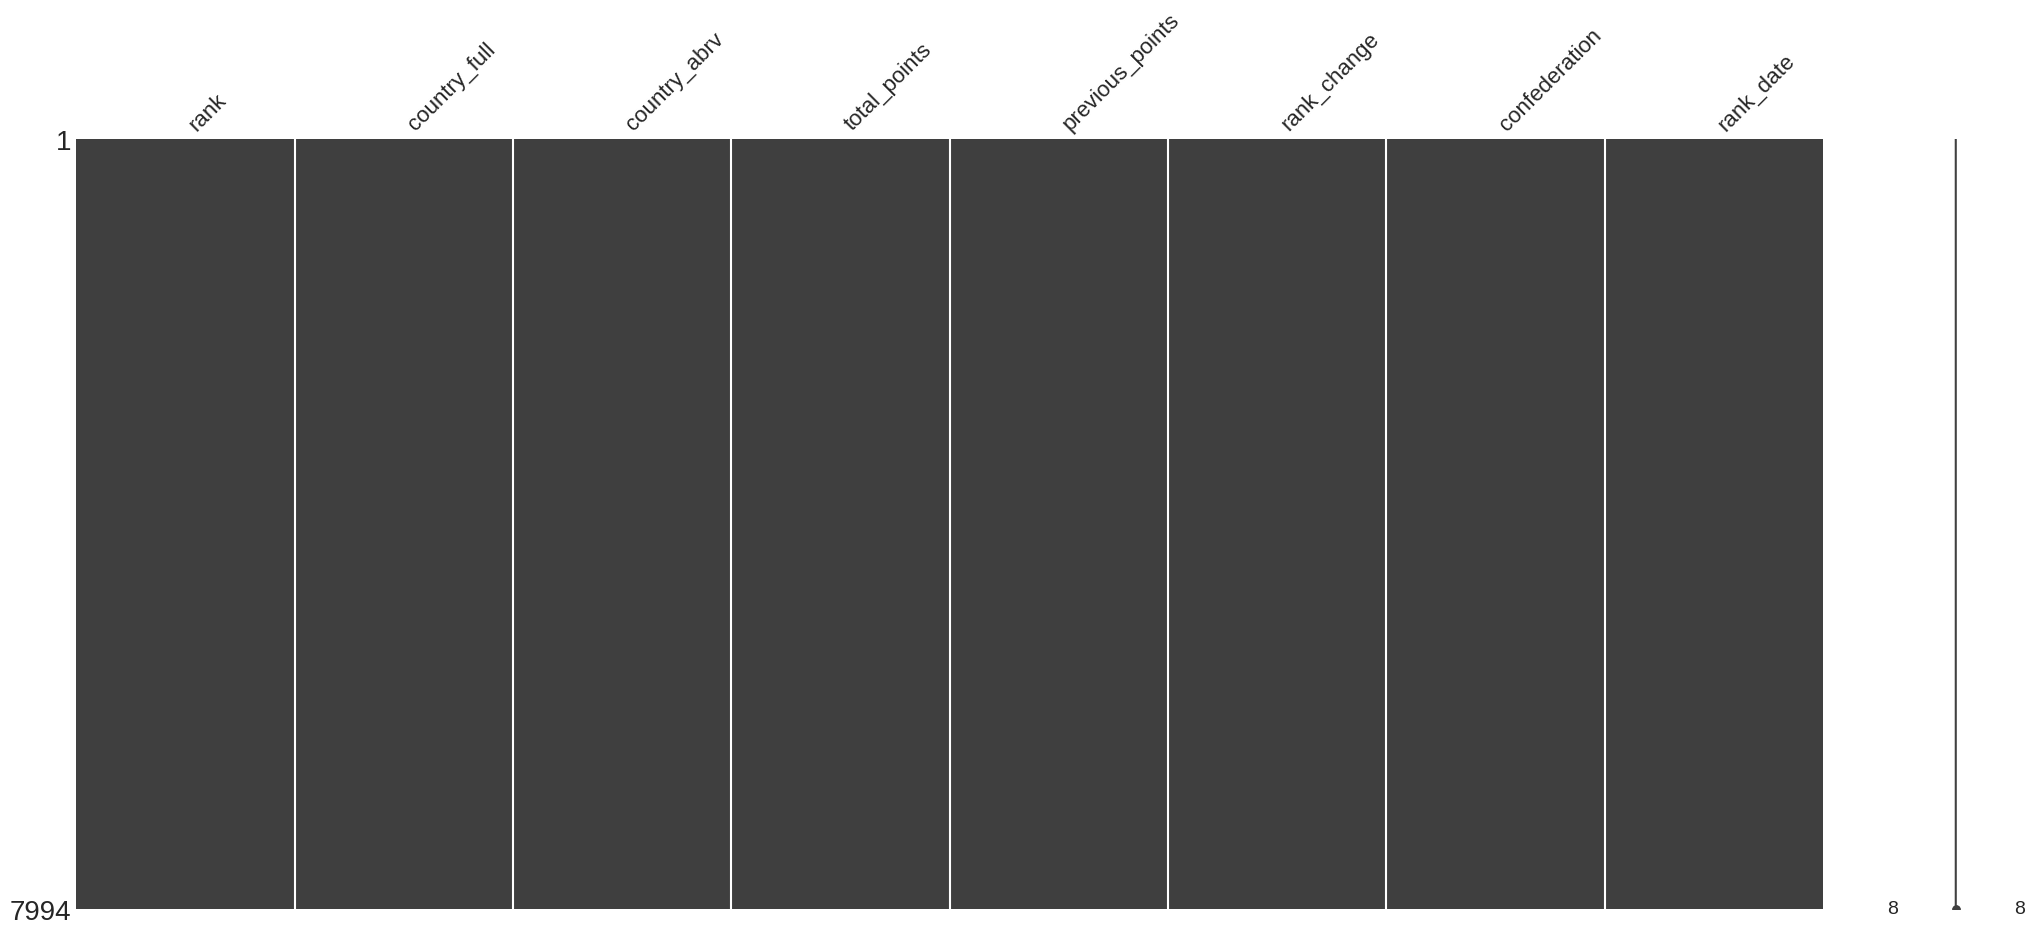

In [ ]:
import missingno as msno
msno.matrix(rank)

In [ ]:
rank.describe()

,rank,total_points,previous_points,rank_change
count,7994.000000,7994.000000,7994.000000,7994.000000
mean,105.603327,1218.565143,1218.136730,-0.003127
std,60.703630,239.929841,239.278384,2.376143
min,1.000000,753.110000,0.000000,-38.000000
25%,53.000000,1017.780000,1017.780000,0.000000
50%,106.000000,1198.120000,1198.805000,0.000000
75%,158.000000,1414.000000,1413.000000,1.000000
max,211.000000,1843.730000,1843.730000,20.000000


disini kita memanggil fungsi describe yang menghasilkan berbagai statistik ringkasan, termasuk count (jumlah), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (median atau kuartil kedua), 75% (kuartil ketiga), dan max (nilai maksimum).



<ipython-input-40-26012e183a18>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'untuk rank change')

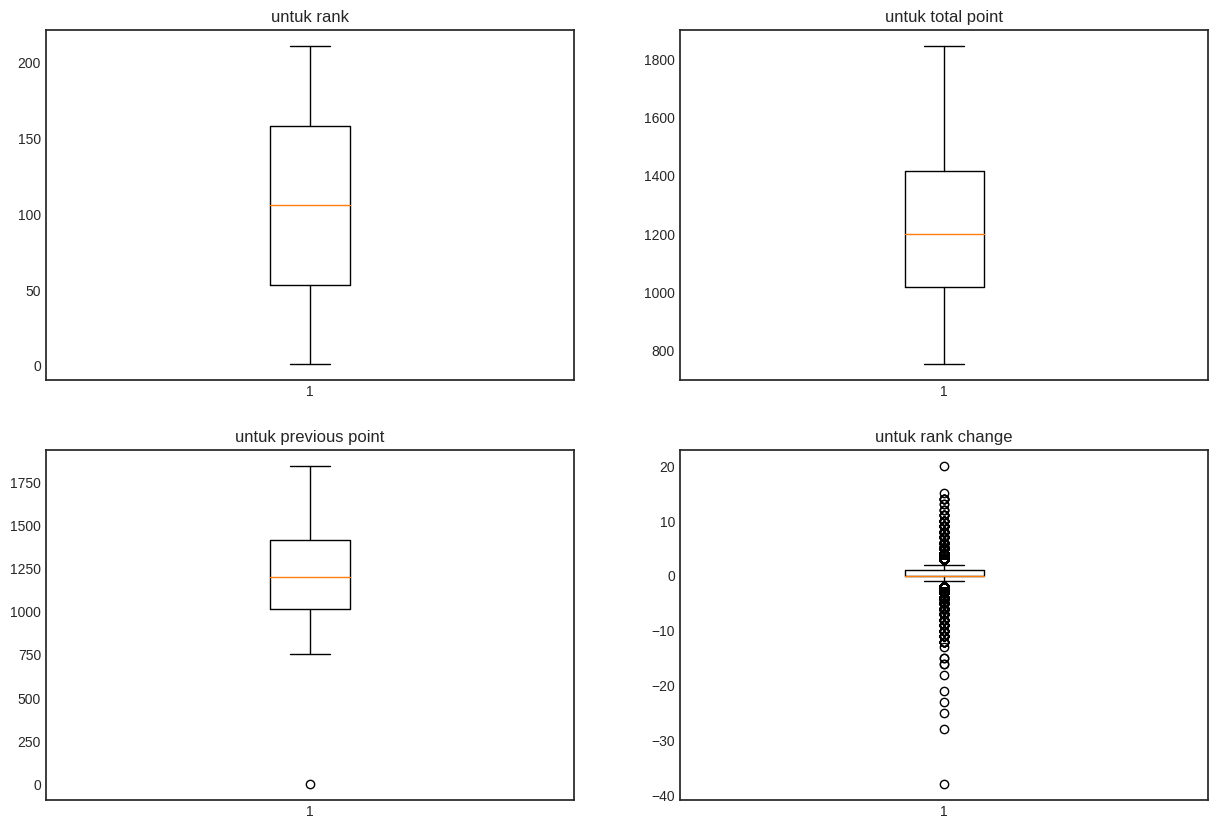

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(rank['rank'])
ax.set_title('untuk rank')
ax=plt.subplot(222)
plt.boxplot(rank['total_points'])
ax.set_title('untuk total point')
ax=plt.subplot(223)
plt.boxplot(rank['previous_points'])
ax.set_title('untuk previous point')
ax=plt.subplot(224)
plt.boxplot(rank['rank_change'])
ax.set_title('untuk rank change')


disini kita memvisualisasi dengan menggunakan box plot

**catatan**

kami tidak memasukan rank_change untuk dilakukan visualisasi dan penanganan outlier

karena Dalam konteks dataset sepak bola, rank_change biasanya merujuk pada perubahan dalam peringkat suatu tim  dari satu periode waktu ke periode waktu berikutnya.

Misalnya, jika sebuah tim berada di peringkat 3 bulan lalu dan sekarang berada di peringkat 2, maka rank_change mereka adalah +1. Sebaliknya, jika tim berada di peringkat 2 bulan lalu dan sekarang berada di peringkat 3, maka rank_change mereka adalah -1. Nilai ini dapat digunakan untuk melacak kinerja tim sepanjang waktu.

singkatnya ini menunjukkan tim yang memiliki peningkatan atau penurunan kinerja yang signifikan dalam periode waktu tertentu.

alasan juga karena dapat mengganggu beberapa metode analisis dan model statistik atau machine learning.

karena dengan dilakukan outlier berarti ada baris yang dihapus karena Baris yang hilang setelah menerapkan metode IQR adalah baris yang berisi outlier.


adapun ini tampilan rank_change dengan boxplot

<ipython-input-41-2044ef16321f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'untuk rank change')

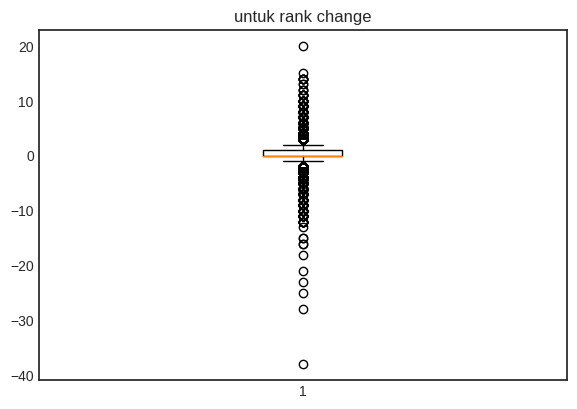

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(rank['rank_change'])
ax.set_title('untuk rank change')

disini kita hanya menangani outlier pada bagian previos point

In [ ]:
rank = rank.loc[clean_outliner(rank['previous_points'],0.25,0.75)]


disini kita melakukan penghapusan (outliers) dari kolom previous_points dalam DataFrame rank menggunakan metode IQR (Interquartile Range).

- Fungsi clean_outliner(data,start_quantile,end_quantile) telah didefinisikan sebelumnya. Fungsi ini menerima tiga argumen: data (Series atau DataFrame),

- start_quantile (kuartil awal), dan end_quantile (kuartil akhir). Fungsi ini mengembalikan boolean Series yang menunjukkan apakah setiap nilai dalam data berada dalam rentang yang didefinisikan oleh Q1 - 1.5IQR dan Q3 + 1.5IQR. Nilai di luar rentang ini dianggap sebagai outlier.

Fungsi clean_outliner() kemudian diterapkan pada kolom previous_points dalam DataFrame rank. Baris yang berisi outlier dihapus dari DataFrame menggunakan metode loc[].

<ipython-input-43-23296a468e07>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'untuk previous point')

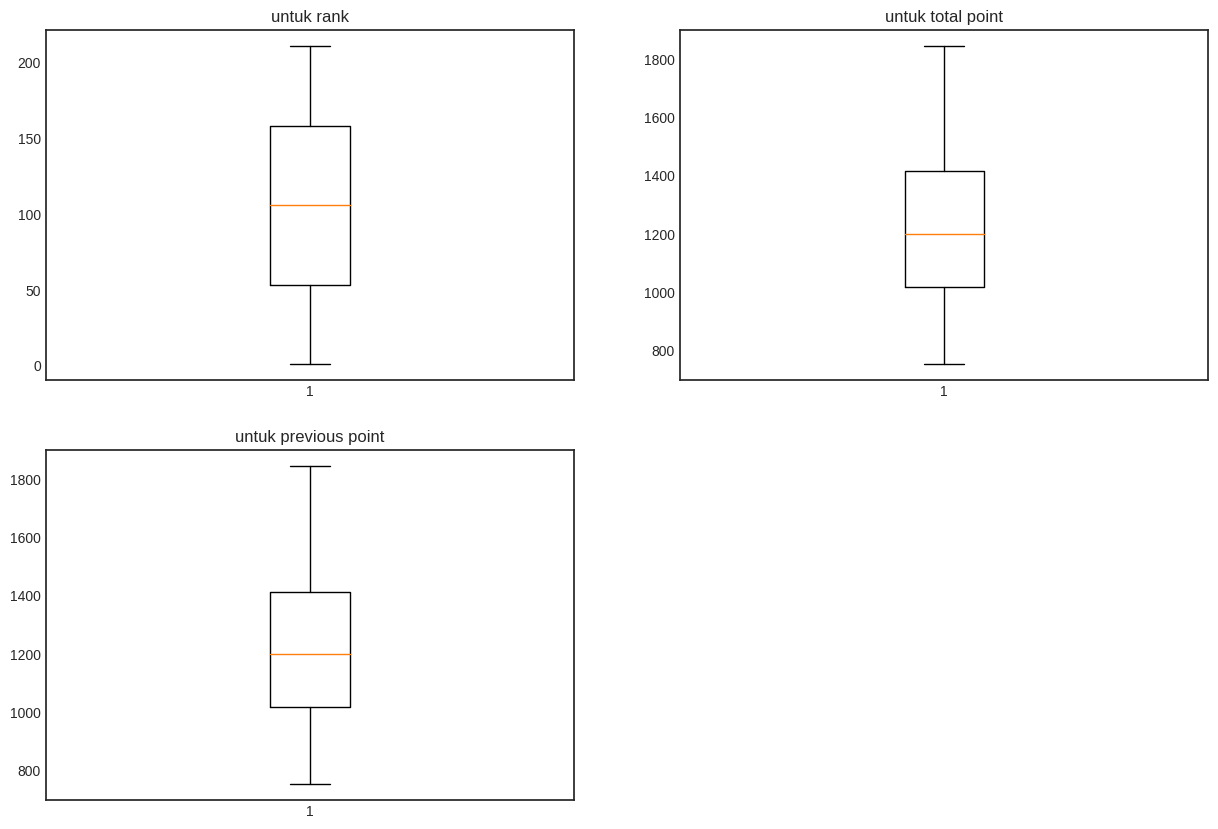

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(rank['rank'])
ax.set_title('untuk rank')
ax=plt.subplot(222)
plt.boxplot(rank['total_points'])
ax.set_title('untuk total point')
ax=plt.subplot(223)
plt.boxplot(rank['previous_points'])
ax.set_title('untuk previous point')

bisa kita llhat pada visualisasi diatas.. outlier sudah tidak ada pada kolom diatas..

In [ ]:
rank.shape

(7993, 8)

disini kita mengecek baris serta kolom pada data frame rank

dimana terdapat 7993 baris dan 8 kolom

In [ ]:
rank.dtypes

rank                        int64
country_full               object
country_abrv               object
total_points              float64
previous_points           float64
rank_change                 int64
confederation              object
rank_date          datetime64[ns]
dtype: object

In [ ]:
rank.isna().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

#hal yang diubah

Beberapa tim yang berpartisipasi dalam Piala Dunia memiliki nama yang berbeda dalam dataset peringkat FIFA. Ini menyebabkan ketidaksesuaian antara nama tim dalam dataset peringkat dengan nama tim yang sesungguhnya berkompetisi dalam Piala Dunia.

Untuk mengatasi perbedaan ini, perlu dilakukan penyesuaian atau pemetaan nama tim antara kedua dataset tersebut. Proses ini bertujuan untuk mencocokkan nama tim di dataset peringkat dengan nama yang sesuai di dataset Piala Dunia sehingga informasi peringkat dapat digunakan dengan benar dalam analisis terkait pertandingan Piala Dunia.

In [ ]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

Kode ini melakukan beberapa operasi pada DataFrame “rank”:

rank.set_index(['rank_date']): Ini mengatur kolom ‘rank_date’ sebagai indeks DataFrame.

groupby(['country_full'], group_keys=False): Ini mengelompokkan data berdasarkan kolom ‘country_full’. Parameter group_keys=False mencegah pengelompokan dari menambahkan kolom pengelompokan sebagai indeks.

resample('D'): Ini mengubah frekuensi sampel data menjadi harian (‘D’). Jika ada beberapa baris data untuk hari yang sama, fungsi ini akan mengambil baris pertama.

first(): Ini mengambil baris pertama untuk setiap grup. Dalam konteks ini, itu akan mengambil baris pertama untuk setiap hari.

fillna(method='ffill'): Ini mengisi nilai NaN dalam DataFrame dengan metode ‘forward fill’, yang menggantikan nilai NaN dengan nilai terakhir yang valid sepanjang kolom.

reset_index(): Ini mereset indeks DataFrame ke default integer index.

Secara keseluruhan, kode ini mengubah DataFrame “rank” menjadi format di mana setiap negara memiliki satu baris data per hari, dengan nilai NaN diisi dengan nilai terakhir yang valid.

In [ ]:
rank.head(10)

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2018-08-16,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
1,2018-08-17,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
2,2018-08-18,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
3,2018-08-19,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
4,2018-08-20,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
5,2018-08-21,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
6,2018-08-22,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
7,2018-08-23,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
8,2018-08-24,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
9,2018-08-25,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC


disini kita menampilkan 10 data pertama dalam dataframe tersebut

In [ ]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

Kode ini melakukan beberapa operasi pada DataFrame “rank”:

- rank.set_index(['rank_date']):

Ini mengatur kolom ‘rank_date’ sebagai indeks DataFrame.

- groupby(['country_full'], group_keys=False):

Ini mengelompokkan data berdasarkan kolom ‘country_full’. Parameter group_keys=False mencegah pengelompokan dari menambahkan kolom pengelompokan sebagai indeks.

- resample('D'):

Ini mengubah frekuensi sampel data menjadi harian (‘D’). Jika ada beberapa baris data untuk hari yang sama, fungsi ini akan mengambil baris pertama.

- first():

Ini mengambil baris pertama untuk setiap grup. Dalam konteks ini, itu akan mengambil baris pertama untuk setiap hari.

- fillna(method='ffill'):

Ini mengisi nilai NaN dalam DataFrame dengan metode ‘forward fill’, yang menggantikan nilai NaN dengan nilai terakhir yang valid sepanjang kolom.

- reset_index():

Ini mereset indeks DataFrame ke default integer index.

Secara keseluruhan, kode ini mengubah DataFrame “rank” menjadi format di mana setiap negara memiliki satu baris data per hari, dengan nilai NaN diisi dengan nilai terakhir yang valid.

In [ ]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

Kode ini melakukan dua operasi penggabungan pada DataFrame “df” dan “rank”:

df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1): Baris ini menggabungkan DataFrame “df” dan “rank” berdasarkan kolom “date” dan “home_team” dari “df” dan “rank_date” dan “country_full” dari “rank”. Hanya kolom “country_full”, “total_points”, “previous_points”, “rank”, “rank_change”, dan “rank_date” dari “rank” yang digunakan dalam penggabungan. Setelah penggabungan, kolom “rank_date” dan “country_full” dihapus dari DataFrame hasil.

df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1): Baris ini melakukan operasi yang sama seperti sebelumnya, tetapi kali ini menggabungkan berdasarkan “date” dan “away_team” dari “df_wc_ranked” dan “rank_date” dan “country_full” dari “rank”. Suffix “_home” dan “_away” ditambahkan ke nama kolom yang tumpang tindih untuk membedakan antara tim rumah dan tim tamu.

Secara keseluruhan, kode ini menggabungkan informasi peringkat dari DataFrame “rank” ke DataFrame “df” berdasarkan tanggal pertandingan dan tim rumah/tamu, menghasilkan DataFrame baru “df_wc_ranked” yang berisi informasi peringkat untuk setiap tim dalam setiap pertandingan.

In [ ]:
df_wc_ranked.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,1120.0,130.0,0.0,1312.0,1312.0,77.0,0.0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,980.0,168.0,0.0,1400.0,1400.0,54.0,0.0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,1064.0,146.0,0.0,940.0,940.0,181.0,0.0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,1400.0,1400.0,54.0,0.0
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,940.0,940.0,181.0,0.0
5,2018-08-29,Bangladesh,Sri Lanka,0,1,Friendly,Nilphamari Sadar,Bangladesh,False,904.0,904.0,194.0,0.0,888.0,888.0,200.0,0.0
6,2018-08-29,Barbados,Cuba,0,2,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,940.0,940.0,181.0,0.0
7,2018-08-29,Macau,Solomon Islands,1,4,Friendly,Taipa,Macau,False,924.0,924.0,185.0,0.0,1072.0,1072.0,143.0,0.0
8,2018-09-02,Ethiopia,Burundi,1,1,Friendly,Hawassa,Ethiopia,False,1044.0,1044.0,151.0,0.0,1056.0,1056.0,148.0,0.0
9,2018-09-04,Macau,Guam,2,0,EAFF Championship,Ulaanbaatar,Mongolia,True,924.0,924.0,185.0,0.0,912.0,912.0,190.0,0.0


In [ ]:
df_wc_ranked.shape

(3246, 17)

disini kita mengecek dimensi dari data frame tersebut.

df.shape: Ini adalah properti Pandas DataFrame yang memberikan informasi tentang dimensi dari DataFrame, yaitu jumlah baris dan jumlah kolom

berarti dalam dataframe tersebut terdapat 3655 baris dan 17 kolom.

Metode ini sering digunakan untuk mengetahui ukuran atau dimensi DataFrame sebelum melakukan operasi pengolahan data atau analisis lebih lanjut.

In [ ]:
df_wc_ranked.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away'],
      dtype='object')

selanjutnya kita melakukan pengecekan berupa array atau daftar yang berisi nama-nama kolom dari DataFrame.

Metode ini memudahkan dalam memahami struktur DataFrame dan memungkinkan pengguna untuk mengidentifikasi kolom yang tersedia.


Output tersebut menampilkan baris header atau nama kolom dari sebuah DataFrame dalam Python. Kolom-kolom tersebut mencakup informasi terkait data pertandingan sepak bola, seperti:

date: Tanggal pertandingan.

home_team: Tim tuan rumah.

away_team: Tim tamu.

home_score: Skor tim tuan rumah.

away_score: Skor tim tamu.

tournament: Jenis turnamen atau kompetisi.

city: Kota di mana pertandingan dilaksanakan.

country: Negara tempat pertandingan berlangsung.

neutral: Status pertandingan, apakah netral atau tidak.

total_points_home: Ini adalah total poin yang dimiliki oleh tim tuan rumah pada tanggal pertandingan. Poin ini dihitung berdasarkan performa tim dalam pertandingan yang mereka mainkan.

previous_points_home: Ini adalah jumlah poin yang dimiliki oleh tim tuan rumah sebelum tanggal pertandingan. Ini memberikan gambaran tentang performa tim sebelum pertandingan tersebut.

rank_home: Ini adalah peringkat global tim tuan rumah pada tanggal pertandingan. Peringkat ini dihitung oleh organisasi sepak bola internasional berdasarkan performa tim dalam pertandingan yang mereka mainkan.

rank_change_home: Ini adalah perubahan dalam peringkat tim tuan rumah dari peringkat sebelumnya. Nilai positif menunjukkan peningkatan dalam peringkat, sedangkan nilai negatif menunjukkan penurunan.

total_points_away: Ini adalah total poin yang dimiliki oleh tim tamu pada tanggal pertandingan, dihitung dengan cara yang sama seperti total_points_home.

previous_points_away: Ini adalah jumlah poin yang dimiliki oleh tim tamu sebelum tanggal pertandingan, dihitung dengan cara yang sama seperti previous_points_home.

rank_away: Ini adalah peringkat global tim tamu pada tanggal pertandingan, dihitung dengan cara yang sama seperti rank_home.

rank_change_away: Ini adalah perubahan dalam peringkat tim tamu dari peringkat sebelumnya, dihitung dengan cara yang sama seperti rank_change_home.

Output dtype='object' menunjukkan bahwa jenis data dari setiap kolom adalah objek. Ini biasanya berarti terdapat kombinasi beragam jenis data dalam kolom tersebut, seperti string, bilangan bulat, atau mungkin juga tipe data lainnya, tergantung pada isi dari DataFrame tersebut.

**BAGAIMANA CARA MENGITUNG KOLOM TERSEBUT**

total_points_home dan total_points_away: Total poin yang dimiliki oleh tim tuan rumah dan tim tamu dihitung berdasarkan performa mereka dalam pertandingan yang mereka mainkan. Poin ini dihitung dengan menambah atau mengurangi poin yang dimenangkan atau hilang untuk suatu pertandingan dari total poin sebelumnya. Poin yang ditambahkan atau dikurangi sebagian ditentukan oleh kekuatan relatif kedua lawan, termasuk ekspektasi logis bahwa tim yang lebih tinggi dalam peringkat harus berkinerja lebih baik melawan tim yang lebih rendah dalam peringkat.

previous_points_home dan previous_points_away: Ini adalah jumlah poin yang dimiliki oleh tim tuan rumah dan tim tamu sebelum tanggal pertandingan. Ini memberikan gambaran tentang performa tim sebelum pertandingan tersebut.

rank_home dan rank_away: Ini adalah peringkat global tim tuan rumah dan tim tamu pada tanggal pertandingan. Peringkat ini dihitung oleh FIFA berdasarkan performa tim dalam pertandingan yang mereka mainkan.

rank_change_home dan rank_change_away: Ini adalah perubahan dalam peringkat tim tuan rumah dan tim tamu dari peringkat sebelumnya. Nilai positif menunjukkan peningkatan dalam peringkat, sedangkan nilai negatif menunjukkan penurunan.

In [ ]:
df_wc_ranked.dtypes

date                    datetime64[ns]
home_team                       object
away_team                       object
home_score                       int64
away_score                       int64
tournament                      object
city                            object
country                         object
neutral                           bool
total_points_home              float64
previous_points_home           float64
rank_home                      float64
rank_change_home               float64
total_points_away              float64
previous_points_away           float64
rank_away                      float64
rank_change_away               float64
dtype: object

In [ ]:
df_wc_ranked.isnull().any()

date                    False
home_team               False
away_team               False
home_score              False
away_score              False
tournament              False
city                    False
country                 False
neutral                 False
total_points_home       False
previous_points_home    False
rank_home               False
rank_change_home        False
total_points_away       False
previous_points_away    False
rank_away               False
rank_change_away        False
dtype: bool

Kode df_wc_ranked.isnull().any() digunakan untuk memeriksa apakah ada nilai yang hilang (NaN) dalam DataFrame df_wc_ranked.

Fungsi isnull() menghasilkan DataFrame yang sama dengan df_wc_ranked, tetapi dengan setiap nilai diganti oleh nilai boolean yang menunjukkan apakah nilai tersebut adalah NaN atau tidak.

Kemudian, fungsi any() diterapkan pada DataFrame ini, yang mengembalikan Seri yang menunjukkan apakah setiap kolom memiliki setidaknya satu nilai True (yang akan menunjukkan bahwa kolom tersebut memiliki setidaknya satu nilai NaN).

Jadi, Jika semua nilai adalah False, itu berarti tidak ada nilai yang hilang dalam DataFrame.

<Axes: >

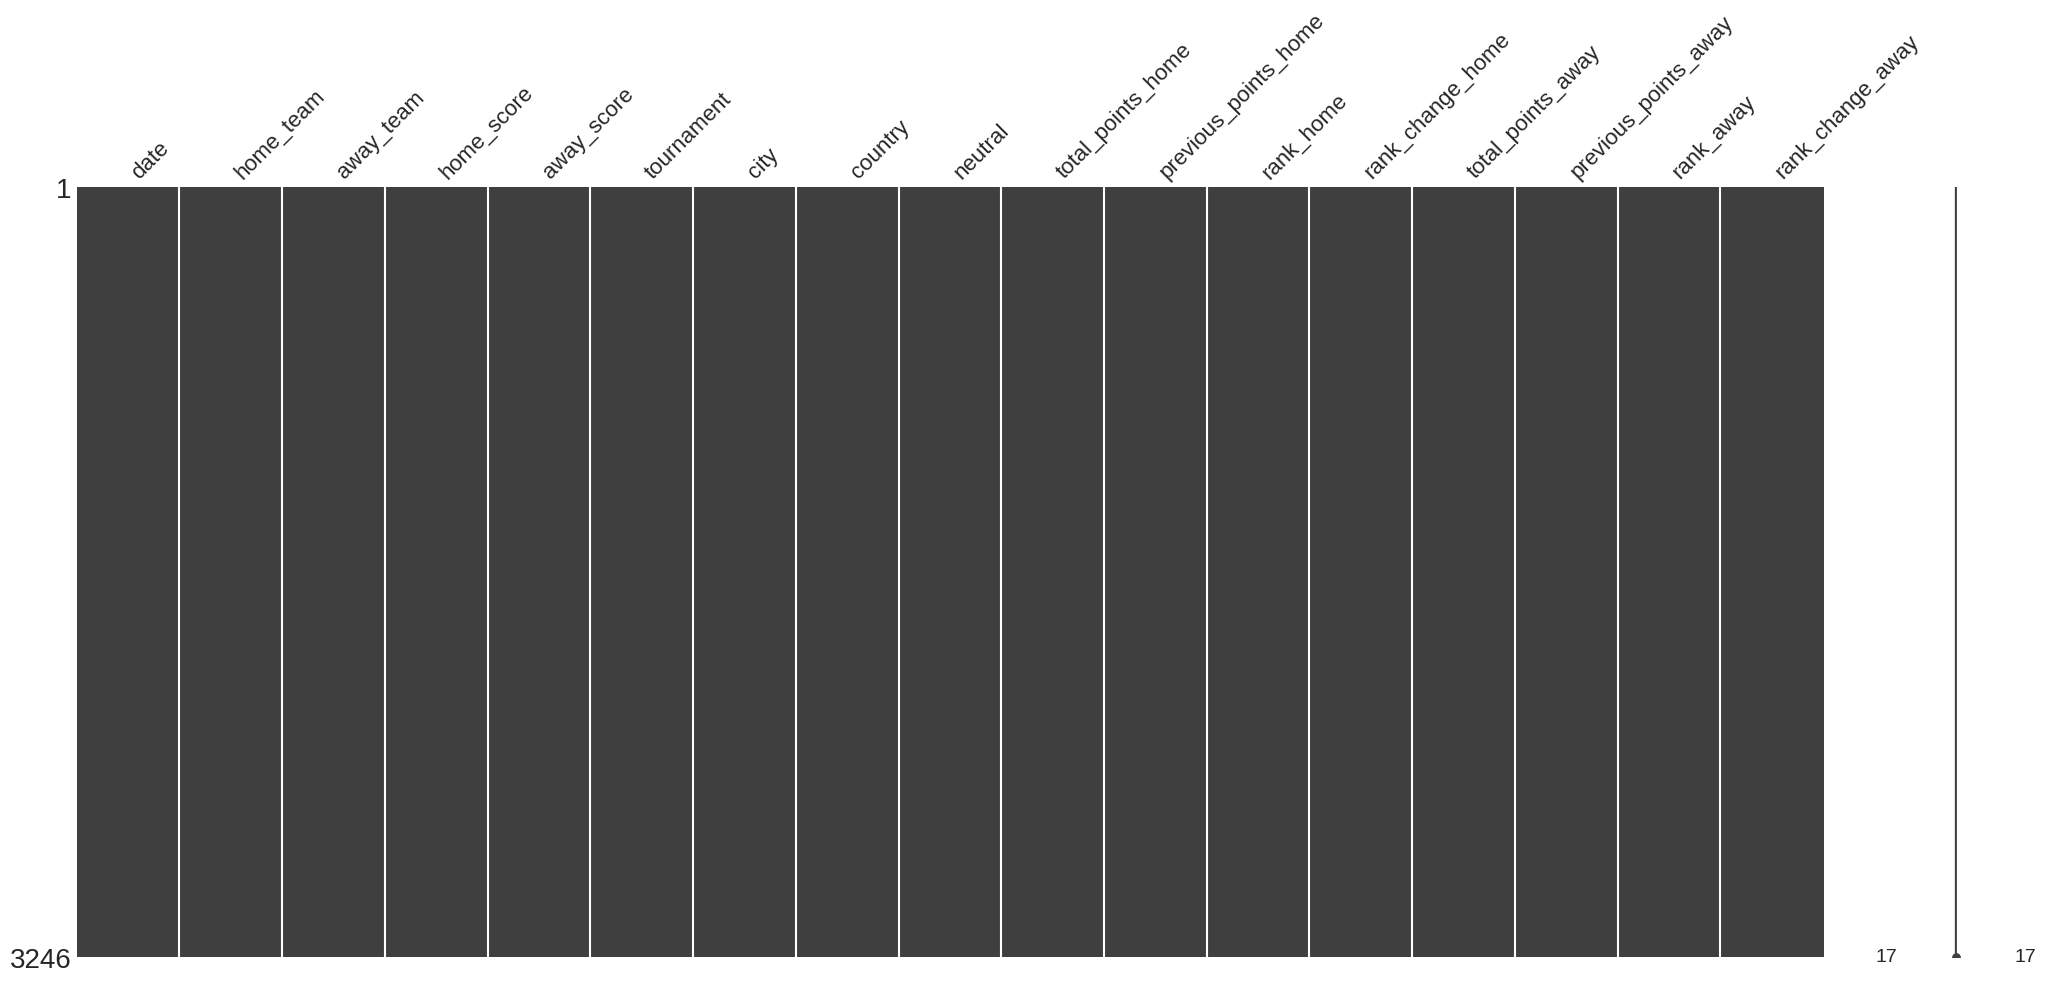

In [ ]:
import missingno as msno
msno.matrix(df_wc_ranked)

bisa kita lihat ...tidak ada data yang kosong ataupun null dari dataframe ini

In [ ]:
df_wc_ranked.describe()

,home_score,away_score,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
count,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000
mean,1.165434,1.070856,1305.430046,1304.856781,83.556069,0.052064,1302.700712,1301.784747,84.003697,-0.012939
std,0.989336,1.131112,229.171639,228.076891,55.991275,2.625007,223.304870,222.144491,54.573596,2.412695
min,0.000000,0.000000,759.120000,762.220000,1.000000,-28.000000,763.150000,762.220000,1.000000,-25.000000
25%,0.000000,0.000000,1131.000000,1131.720000,36.000000,-1.000000,1134.060000,1132.500000,38.000000,-1.000000
50%,1.000000,1.000000,1321.240000,1321.970000,76.000000,0.000000,1311.255000,1312.500000,78.000000,0.000000
75%,2.000000,2.000000,1478.617500,1478.000000,126.000000,1.000000,1467.850000,1467.850000,125.000000,1.000000
max,3.000000,5.000000,1841.300000,1840.770000,211.000000,14.000000,1841.300000,1841.300000,211.000000,14.000000


<ipython-input-58-5a6434e07c47>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'untuk total previous point home ')

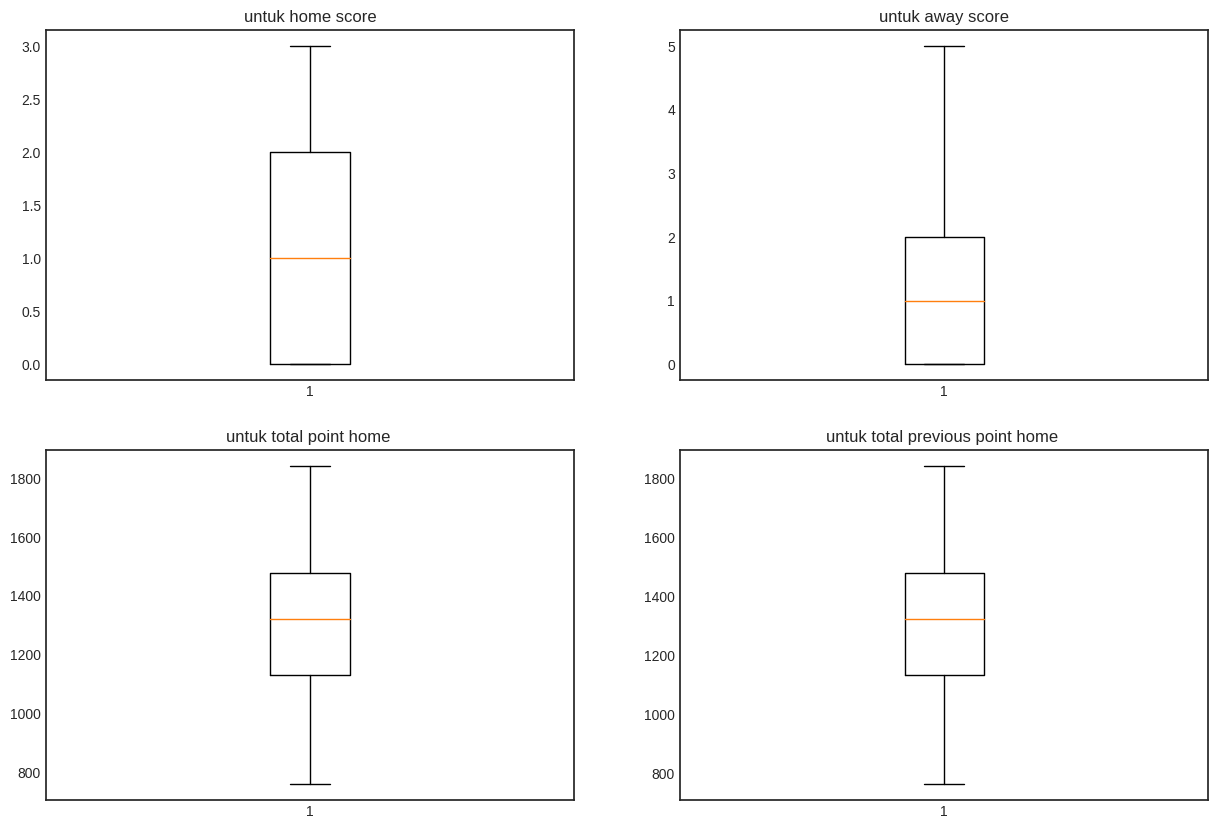

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df_wc_ranked['home_score'])
ax.set_title('untuk home score')
ax=plt.subplot(222)
plt.boxplot(df_wc_ranked['away_score'])
ax.set_title('untuk away score')
ax=plt.subplot(223)
plt.boxplot(df_wc_ranked['total_points_home'])
ax.set_title('untuk total point home ')
ax=plt.subplot(224)
plt.boxplot(df_wc_ranked['previous_points_home'])
ax.set_title('untuk total previous point home ')


<ipython-input-59-f9bd42c93d4d>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'untuk total previous point away')

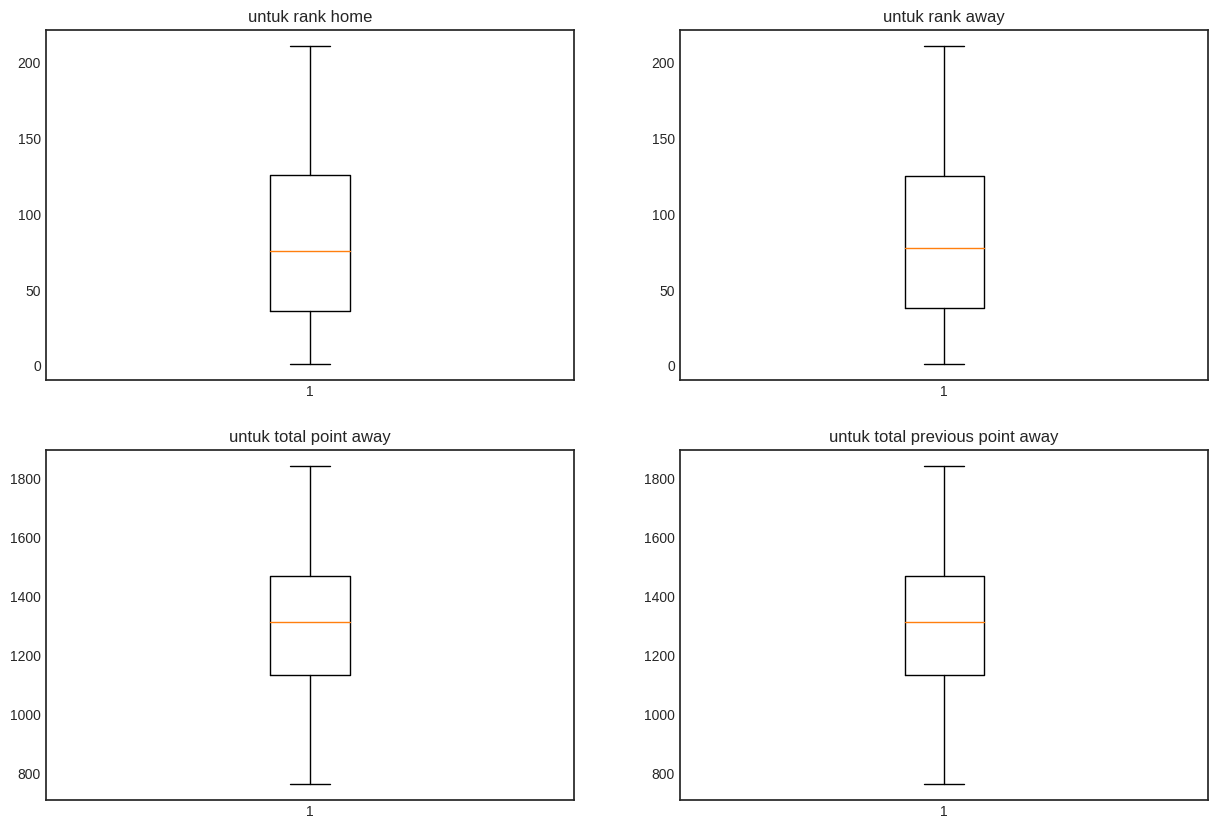

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df_wc_ranked['rank_home'])
ax.set_title('untuk rank home')
ax=plt.subplot(222)
plt.boxplot(df_wc_ranked['rank_away'])
ax.set_title('untuk rank away')
ax=plt.subplot(223)
plt.boxplot(df_wc_ranked['total_points_away'])
ax.set_title('untuk total point away')
ax=plt.subplot(224)
plt.boxplot(df_wc_ranked['previous_points_away'])
ax.set_title('untuk total previous point away')

bisa dilihat semua data bersih dari outlier

sebagai contoh negara argentina

In [ ]:
df_wc_ranked[(df_wc_ranked.home_team == "Argentina") | (df_wc_ranked.away_team == "Argentina")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
2907,2022-11-22,Argentina,Saudi Arabia,1,2,FIFA World Cup,Lusail,Qatar,True,1773.88,1770.65,3.0,0.0,1437.78,1435.74,51.0,-2.0
2919,2022-11-26,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True,1773.88,1770.65,3.0,0.0,1644.89,1649.57,13.0,1.0
2931,2022-11-30,Poland,Argentina,0,2,FIFA World Cup,Doha,Qatar,True,1548.59,1546.18,26.0,0.0,1773.88,1770.65,3.0,0.0
2942,2022-12-03,Argentina,Australia,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1773.88,1770.65,3.0,0.0,1488.72,1483.73,38.0,-1.0
2948,2022-12-09,Netherlands,Argentina,2,2,FIFA World Cup,Lusail,Qatar,True,1694.51,1679.41,8.0,0.0,1773.88,1770.65,3.0,0.0
2951,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,1773.88,1770.65,3.0,0.0,1645.64,1632.15,12.0,-3.0
2957,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,1773.88,1770.65,3.0,0.0,1759.78,1764.85,4.0,0.0
2996,2023-03-23,Argentina,Panama,2,0,Friendly,Buenos Aires,Argentina,False,1838.38,1773.88,2.0,-1.0,1391.70,1393.28,61.0,1.0
3141,2023-06-15,Argentina,Australia,2,0,Friendly,Beijing,China PR,True,1840.93,1838.38,1.0,-1.0,1532.79,1533.97,29.0,2.0
3186,2023-06-19,Indonesia,Argentina,0,2,Friendly,Jakarta,Indonesia,False,1046.14,1033.90,149.0,-2.0,1840.93,1838.38,1.0,-1.0


pada Kode ini digunakan untuk memilih 10 pertandingan terakhir di mana tim “Argentina” berpartisipasi, baik sebagai tim tuan rumah atau tim tamu, dari DataFrame df_wc_ranked.

df_wc_ranked[(df_wc_ranked.home_team == "Argentina") | (df_wc_ranked.away_team == "Argentina")]:

Bagian ini memilih baris dari DataFrame df_wc_ranked di mana “Argentina” adalah tim tuan rumah (kolom home_team) atau tim tamu (kolom away_team).

Operator | digunakan untuk ‘OR’, yang berarti bahwa salah satu kondisi harus benar.

tail(10): Fungsi ini digunakan untuk memilih 10 baris terakhir dari DataFrame yang dihasilkan.

Dalam konteks ini, itu akan mengembalikan 10 pertandingan terakhir di mana “Argentina” berpartisipasi.

Jadi, secara keseluruhan, kode ini digunakan untuk memeriksa 10 pertandingan terakhir di mana “Argentina” berpartisipasi.


In [ ]:
"""Ini adalah fungsi sederhana yang mengembalikan 1
jika nilai x sama dengan "Friendly" dan 0 jika tidak"""
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

df_wc_ranked["is_friendly"] = df_wc_ranked["tournament"].apply(lambda x: find_friendly(x))

In [ ]:
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,is_friendly
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,1120.0,130.0,0.0,1312.0,1312.0,77.0,0.0,1
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,980.0,168.0,0.0,1400.0,1400.0,54.0,0.0,1
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,1064.0,146.0,0.0,940.0,940.0,181.0,0.0,1
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,1400.0,1400.0,54.0,0.0,1
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,940.0,940.0,181.0,0.0,1


In [ ]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0]) # (kategori, poin away, poin home)
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df_wc_ranked.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [ ]:
df_wc_ranked[["result", "home_team_points", "away_team_points"]] = results

In [ ]:
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,is_friendly,result,home_team_points,away_team_points
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,...,130.0,0.0,1312.0,1312.0,77.0,0.0,1,2,1,1
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,...,168.0,0.0,1400.0,1400.0,54.0,0.0,1,1,0,3
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,...,146.0,0.0,940.0,940.0,181.0,0.0,1,0,3,0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.0,...,160.0,0.0,1400.0,1400.0,54.0,0.0,1,2,1,1
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,False,1005.0,...,160.0,0.0,940.0,940.0,181.0,0.0,1,2,1,1


In [ ]:
# Menggantikan True dengan 1 dan False dengan 0 pada kolom 'nama_kolom'
df_wc_ranked['neutral'].replace({True: 1, False: 0}, inplace=True)

In [ ]:
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,is_friendly,result,home_team_points,away_team_points
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,1,1120.0,...,130.0,0.0,1312.0,1312.0,77.0,0.0,1,2,1,1
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,0,980.0,...,168.0,0.0,1400.0,1400.0,54.0,0.0,1,1,0,3
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,0,1064.0,...,146.0,0.0,940.0,940.0,181.0,0.0,1,0,3,0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,0,1005.0,...,160.0,0.0,1400.0,1400.0,54.0,0.0,1,2,1,1
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,0,1005.0,...,160.0,0.0,940.0,940.0,181.0,0.0,1,2,1,1


In [ ]:
df_wc_ranked.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'is_friendly', 'result', 'home_team_points',
       'away_team_points'],
      dtype='object')

# Fitur seleksi

In [ ]:
final_df=df_wc_ranked.copy()

In [ ]:
final_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,is_friendly,result,home_team_points,away_team_points
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,1,1120.0,...,130.0,0.0,1312.0,1312.0,77.0,0.0,1,2,1,1
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,0,980.0,...,168.0,0.0,1400.0,1400.0,54.0,0.0,1,1,0,3
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,0,1064.0,...,146.0,0.0,940.0,940.0,181.0,0.0,1,0,3,0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,0,1005.0,...,160.0,0.0,1400.0,1400.0,54.0,0.0,1,2,1,1
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,0,1005.0,...,160.0,0.0,940.0,940.0,181.0,0.0,1,2,1,1


In [ ]:
# Menghapus beberapa kolom berdasarkan nama kolom
delete_columns = ['home_team','away_team',	'home_score','away_score','date', 'city', 'country','tournament', 'home_team_points','away_team_points']
final_df = final_df.drop(columns=delete_columns)

In [ ]:
final_df.head()

,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,is_friendly,result
0,1,1120.0,1120.0,130.0,0.0,1312.0,1312.0,77.0,0.0,1,2
1,0,980.0,980.0,168.0,0.0,1400.0,1400.0,54.0,0.0,1,1
2,0,1064.0,1064.0,146.0,0.0,940.0,940.0,181.0,0.0,1,0
3,0,1005.0,1008.0,160.0,0.0,1400.0,1400.0,54.0,0.0,1,2
4,0,1005.0,1008.0,160.0,0.0,940.0,940.0,181.0,0.0,1,2


In [ ]:
X = final_df.iloc[:,:-1]

In [ ]:
y = final_df[['result']]

Fitur kategori :
1. home_team
2. away_team
3. home_score
4. away_score
5. neutral
6. total_points_home
7. previous_points_home
8. rank_home
9. rank_change_home
10. total_points_away
11. previous_points_away
12. rank_away
13. rank_change_away
14. is_friendly

Kelas Target :
1. Result => 0 artinya home_team menang, 1 artinya away_team menang, 2 artinya seri

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# gradien boost

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [ ]:
# Menampilkan parameter terbaik
print("Parameter Terbaik:", gb_cv.best_params_)

# Akurasi training
y_pred_train = gb_cv.predict(X_train.values)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Akurasi Training: {accuracy_train * 100:.2f}%")

# Akurasi testing
y_pred_test = gb_cv.predict(X_test.values)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Akurasi Testing: {accuracy_test * 100:.2f}%")

Parameter Terbaik: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Akurasi Training: 63.73%
Akurasi Testing: 55.54%


In [ ]:
gb = gb_cv.best_estimator_

In [ ]:
gb

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=200, random_state=5)

## My model with random forest

In [ ]:
params_rf = {
    "max_depth": [None, 10, 15, 20, 25],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_leaf_nodes": [None, 50, 100, 150, 200],
    "n_estimators": [100, 150, 200, 250],
    "max_features": ["sqrt"]
}

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, params_rf, cv=3, n_jobs=-1, verbose=False)
rf_cv.fit(X_train.values, np.ravel(y_train))

# Menampilkan parameter terbaik
print("Parameter Terbaik:", rf_cv.best_params_)

# Akurasi training
y_pred_train = rf_cv.predict(X_train.values)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Akurasi Training: {accuracy_train * 100:.2f}%")

# Akurasi testing
y_pred_test = rf_cv.predict(X_test.values)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Akurasi Testing: {accuracy_test * 100:.2f}%")

## SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definisikan parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
}

# Buat model SVC
svc = SVC(random_state=42)

# Buat objek GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1)

# Latih model dengan Grid Search
grid_search.fit(X_train, y_train)

# Ambil parameter terbaik
best_params = grid_search.best_params_
print(f"Parameter terbaik: {best_params}")

# Prediksi menggunakan model dengan parameter terbaik
y_test_pred = grid_search.predict(X_test)

# Hitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Akurasi pada data uji dengan parameter terbaik: {test_accuracy:.2f}")